In [2]:
pip install fake_useragent

  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=953bd79395310be8110c4a4745c55017023602f5f562d68bb13b5cf0a72d2649
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
Successfully built fake-useragent


In [46]:
import requests
from bs4 import BeautifulSoup
from fake_useragent import UserAgent

ua = UserAgent()
header = {'user-agent':ua.chrome}
google_page = requests.get('https://www.amazon.in/s?k=headphones&crid=1KNIU0KIZ8UF4&sprefix=headphones%2Caps%2C253&ref=nb_sb_noss_1',headers=header)
print(google_page.content)

soup = BeautifulSoup(google_page.content,'lxml') # html.parser

#print(soup.prettify())

b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.s

In [ ]:
print(soup.prettify())

In [135]:
import pandas as pd
import numpy as np

In [136]:
def soup_df(soup):
  df = pd.DataFrame(np.zeros(1000))
  df['Product name'] = soup.find('a',class_="a-link-normal s-link-style a-text-normal").text
  df['mrp'] = soup.find('span',class_="a-price a-text-price").span.text
  df['rating'] = (soup.find('div',class_="a-row a-size-small").text).split()[0]
  df['reviews'] = (soup.find('div',class_="a-row a-size-small").text).split()[5]
  df['offer price'] = soup.find('span',class_="a-price-whole").text
  i = 0
  for data in soup.find_all('a',class_="a-link-normal s-link-style a-text-normal"):
    df['Product name'][i] = data.text
    i=i+1
    
  i = 0
  for mrp in soup.find_all('span',class_="a-price a-text-price"):
    df['mrp'][i] = float(mrp.span.text[1:].replace(',',''))
    i=i+1
    
  i = 0
  for rating in soup.find_all('div',class_="a-row a-size-small"):
    df['rating'][i] = float((rating.text).split()[0])
    i=i+1
    
  i = 0
  for reviews in soup.find_all('div',class_="a-row a-size-small"):
    df['reviews'][i] = float((reviews.text).split()[5].replace(',',''))
    i=i+1
    
  i = 0
  for offer in soup.find_all('span',class_="a-price-whole"):
    df['offer price'][i] = float(offer.text.replace(',',''))
    i=i+1
  
  df = df.drop(0, axis = 1)
  df = df.drop_duplicates(['Product name'])
  return df

In [137]:
df = soup_df(soup)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/py

In [138]:
df.head()

Product name   mrp  ... reviews offer price
0  JBL T460BT by Harman, Wireless On Ear Headphon...  4999  ...   23313        1499
1  Hungama HiLife Buzz 101 On Ear Headphones – 9 ...  8999  ...       2        1799
2  boAt Bassheads 900 Wired On Ear Headphones wit...  3499  ...   71728        2399
3  boAt Rockerz 550 Bluetooth Wireless Over Ear H...  4999  ...   35688        2090
4  boAt Rockerz 450 Bluetooth Wireless On Ear Hea...  2490  ...   68332         599

[5 rows x 5 columns]

<a href="/s?k=headphones&amp;page=2&amp;crid=1KNIU0KIZ8UF4&amp;qid=1642917918&amp;sprefix=headphones%2Caps%2C253&amp;ref=sr_pg_1" class="s-pagination-item s-pagination-next s-pagination-button s-pagination-separator">Next<svg xmlns="http://www.w3.org/2000/svg" width="8" height="12" viewBox="0 0 8 12" focusable="false" aria-hidden="true"><path d="M2.126.35a1.28 1.28 0 00-1.761 0 1.165 1.165 0 000 1.695L4.478 6 .365 9.955a1.165 1.165 0 000 1.694 1.28 1.28 0 001.76 0L8 6 2.126.35z"></path></svg></a>

In [139]:
def next_page_soup(soup):
  next_page = soup.find('a', class_="s-pagination-item s-pagination-next s-pagination-button s-pagination-separator")['href']
  ua = UserAgent()
  header = {'user-agent':ua.chrome}
  google_page = requests.get(str('https://www.amazon.in'+next_page),headers=header)
  print(google_page.content)

  soup1 = BeautifulSoup(google_page.content,'lxml') # html.parser
  return soup1


In [140]:
soup1 = next_page_soup(soup)

b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.s

In [141]:
df1 = soup_df(soup1)
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/py

Product name    mrp  ... reviews offer price
0  HiFiMAN HE400SE Wired Over The Ear Headphone (...   4999  ...     108        1499
1  Boult Audio ProBass Qcharge in-Ear Earphones w...   8999  ...    4293        1799
2  MI Super Bass Bluetooth Wireless On Ear Headph...  16999  ...   12891       14179
3  ENVOUS New Wireless Bluetooth Headset Headphon...   4999  ...     286        1099
4  boAt Bassheads 900 Wired On Ear Headphones wit...   2199  ...   71728        1499

[5 rows x 5 columns]

In [142]:
soup2 = next_page_soup(soup1)
df2 = soup_df(soup2)
soup3 = next_page_soup(soup2)
df3 = soup_df(soup3)

soup4 = next_page_soup(soup3)
df5 = soup_df(soup4)
soup5 = next_page_soup(soup4)
df6 = soup_df(soup5)


b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/py

b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.s

In [209]:
df4 =pd.concat([df,df1,df2,df3,df5,df6], axis = 0)
df4 = df4.drop_duplicates(['Product name'])
df4

Product name  ... offer price
0   JBL T460BT by Harman, Wireless On Ear Headphon...  ...        1499
1   Hungama HiLife Buzz 101 On Ear Headphones – 9 ...  ...        1799
2   boAt Bassheads 900 Wired On Ear Headphones wit...  ...        2399
3   boAt Rockerz 550 Bluetooth Wireless Over Ear H...  ...        2090
4   boAt Rockerz 450 Bluetooth Wireless On Ear Hea...  ...         599
..                                                ...  ...         ...
12  Matlek Gaming Headphones with Adjustable Mic |...  ...         599
13  DUETMI New Combo Wireless Bluetooth Headphones...  ...         279
15  boAt Rockerz 510 Wireless Bluetooth On Ear Hea...  ...        1299
17  Yamaha EP-E50A Wireless Bluetooth in Ear Neckb...  ...        9990
19  Yamaha YH-E500A Wireless Bluetooth On Ear Head...  ...       11990

[93 rows x 5 columns]

In [210]:
df4['reviews'].unique()

array([23313.0, 2.0, 71728.0, 35688.0, 68332.0, 87769.0, 39907.0, 15147.0,
       1184.0, 464.0, 18049.0, 58377.0, 28517.0, 27280.0, 107.0, 79757.0,
       66429.0, 1103.0, 98749.0, 36202.0, 13405.0, 9811.0, 4290.0,
       12891.0, 286.0, 14363.0, 18050.0, 35690.0, 28302.0, 3341.0, 1128.0,
       3156.0, 36476.0, 4.0, 73.0, 3.0, 165.0, 941.0, 68333.0, 14240.0,
       7831.0, 45127.0, 73442.0, 3164.0, 38447.0, 10309.0, 2012.0,
       23027.0, 1.0, 14079.0, 291226.0, 44683.0, 3691.0, 5868.0, 17.0,
       4128.0, 12847.0, 9810.0, '108', 9080.0, 13.0, 112110.0, 6.0,
       1786.0, 457.0, 42.0, 4293.0], dtype=object)

In [211]:
df4.to_csv('Headphone prices')

In [212]:
df4['reviews'] = df4['reviews'].astype(float)
df4 = df4[df4['reviews']>100]

In [213]:
df4.shape

(79, 5)

In [226]:
df4 = df4.reset_index(drop=True)

In [227]:
df4['discount'] = (1-((df4['mrp']-df4['offer price']))/df4['mrp'])*100
df4

Product name  ... discount
0   JBL T460BT by Harman, Wireless On Ear Headphon...  ...   29.986
1   boAt Bassheads 900 Wired On Ear Headphones wit...  ...  68.5624
2   boAt Rockerz 550 Bluetooth Wireless Over Ear H...  ...  41.8084
3   boAt Rockerz 450 Bluetooth Wireless On Ear Hea...  ...  24.0562
4   boAt Rockerz 400 Wireless Bluetooth On Ear Hea...  ...  27.9856
..                                                ...  ...      ...
74  ZEBRONICS Zeb-Thunder Wireless Bluetooth Over ...  ...  49.9583
75  pTron Bassbuds Tango ENC (Environmental Noise ...  ...  32.4831
76  DUETMI New Combo Wireless Bluetooth Headphones...  ...  27.9279
77  boAt Rockerz 510 Wireless Bluetooth On Ear Hea...  ...  32.5564
78  Yamaha YH-E500A Wireless Bluetooth On Ear Head...  ...  81.0135

[79 rows x 6 columns]

In [244]:
new_df = df4.groupby('rating').sum()

In [251]:
new_df['reviews']

rating
3.4       1786.0
3.5      66429.0
3.6     128888.0
3.7       6384.0
3.8     175994.0
3.9     477772.0
4.0     220128.0
4.1    1086599.0
4.2     240543.0
4.3        286.0
4.4        457.0
4.6        107.0
4.5        108.0
Name: reviews, dtype: float64

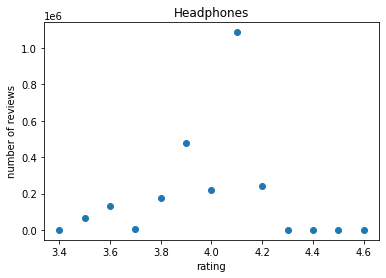

In [258]:
plt.scatter(new_df.index,new_df['reviews'])
plt.xlabel('rating')
plt.ylabel('number of reviews')
plt.title('Headphones')
plt.show()
